# 01 Importing libraries and data

# 02 Data Exploration

# 03 Task

## 3.1 Dropping columns
## 3.2 Creating region flag
## 3.3 Creating an exclusion flag for low activity customers
## 3.4 Creating age flag
## 3.5 Creating income flag
## 3.6 Creating bar chart by department sales
## 3.7 Creating bar chart by regions and departments 
## 3.8 Creating pie chart of loyal customers
## 3.9 Visualizations of number of dependants
## 3.10 Department visualizations
## 3.11 Region Visualizations
## 3.12 Descriptive statistics on customer profile

# 01 Importing Libraries and Data

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing Data

path = r'/Users/alejandroguillen/Documents/Instacart Basket Analysis'

In [3]:
insta_data = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'instacart_combined.pkl'))

# 02 Data Exploration

In [4]:
insta_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
insta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   days_since_last_order  float16 
 6   product_id             int32   
 7   add_to_cart_order      int32   
 8   reordered              int8    
 9   product_name           object  
 10  aisle_id               int8    
 11  department_id          int8    
 12  prices                 float16 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int8    
 19  loyalty_flag           object  
 20  mean_price             float16 
 21  spending_flag          object

In [6]:
#Changing order of columns
new_order = ['order_id','user_id','first_name','last_name','gender','age','state','order_number','date_joined','n_dependants','fam_status','income','orders_day_of_week','order_hour_of_day','days_since_last_order','product_id','add_to_cart_order','reordered','product_name','aisle_id','department_id','prices','_merge','price_range_loc','busiest_day','busiest_days','busiest_period_of_day','max_order','loyalty_flag','mean_price','spending_flag','median_on_days','frequency_flag']


In [7]:
#Reindexing dataframe
insta_data = insta_data[new_order]

In [8]:
#Checkin reindexing output
insta_data.head()

,order_id,user_id,first_name,last_name,gender,age,state,order_number,date_joined,n_dependants,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag
0,2539329,1,Linda,Nguyen,Female,31,Alabama,1,2/17/2019,3,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
1,2398795,1,Linda,Nguyen,Female,31,Alabama,2,2/17/2019,3,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
2,473747,1,Linda,Nguyen,Female,31,Alabama,3,2/17/2019,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
3,2254736,1,Linda,Nguyen,Female,31,Alabama,4,2/17/2019,3,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
4,431534,1,Linda,Nguyen,Female,31,Alabama,5,2/17/2019,3,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer


# 03 Task (Part 1)

## 3.1 Dropping columns

In [9]:
#Dropping first and last name columns due to PII
insta_data = insta_data.drop (columns = ['first_name'])
insta_data = insta_data.drop (columns = ['last_name'])

In [10]:
#Check output

insta_data.head()

,order_id,user_id,gender,age,state,order_number,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag
0,2539329,1,Female,31,Alabama,1,2/17/2019,3,married,40423,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
1,2398795,1,Female,31,Alabama,2,2/17/2019,3,married,40423,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
2,473747,1,Female,31,Alabama,3,2/17/2019,3,married,40423,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
3,2254736,1,Female,31,Alabama,4,2/17/2019,3,married,40423,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
4,431534,1,Female,31,Alabama,5,2/17/2019,3,married,40423,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer


## 3.2 Creating region flag

In [11]:
#Making list of northeastern states

states_ne = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [12]:
#Making list of midwestern states

states_mw = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']


In [13]:
#Making list of southern states

states_s = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [14]:
#Making list of western states

states_w = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [15]:
#Checking output

states_ne

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [16]:
#Creating region column using loc function

insta_data.loc[insta_data['state'].isin(states_ne), 'region'] = 'Northeast'

In [17]:
insta_data.loc[insta_data['state'].isin(states_mw), 'region'] = 'Midwest'

In [18]:
insta_data.loc[insta_data['state'].isin(states_s), 'region'] = 'South'

In [19]:
insta_data.loc[insta_data['state'].isin(states_w), 'region'] = 'West'

In [20]:
#Checking output 

insta_data.head()

,order_id,user_id,gender,age,state,order_number,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,region
0,2539329,1,Female,31,Alabama,1,2/17/2019,3,married,40423,...,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,South
1,2398795,1,Female,31,Alabama,2,2/17/2019,3,married,40423,...,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,South
2,473747,1,Female,31,Alabama,3,2/17/2019,3,married,40423,...,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,South
3,2254736,1,Female,31,Alabama,4,2/17/2019,3,married,40423,...,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,South
4,431534,1,Female,31,Alabama,5,2/17/2019,3,married,40423,...,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,South


In [21]:
#Changing order of columns
new_order_1 = ['order_id','user_id','gender','age','state','region','order_number','date_joined','n_dependants','fam_status','income','orders_day_of_week','order_hour_of_day','days_since_last_order','product_id','add_to_cart_order','reordered','product_name','aisle_id','department_id','prices','_merge','price_range_loc','busiest_day','busiest_days','busiest_period_of_day','max_order','loyalty_flag','mean_price','spending_flag','median_on_days','frequency_flag']

In [22]:
#Reindexing dataframe
insta_data = insta_data[new_order_1]

In [23]:
#Checking reindexing output

insta_data.head()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag
0,2539329,1,Female,31,Alabama,South,1,2/17/2019,3,married,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
1,2398795,1,Female,31,Alabama,South,2,2/17/2019,3,married,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
2,473747,1,Female,31,Alabama,South,3,2/17/2019,3,married,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
3,2254736,1,Female,31,Alabama,South,4,2/17/2019,3,married,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
4,431534,1,Female,31,Alabama,South,5,2/17/2019,3,married,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer


In [24]:
#Checking reindexing output

insta_data.tail()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag
32404854,156685,106143,Male,25,Hawaii,West,26,5/26/2017,0,single,...,Mid-range product,Least busy,Slowest days,Average orders,26,Regular customer,10.703125,High spender,7.0,Frequent customer
32404855,484769,66343,Female,22,Tennessee,South,1,9/12/2017,3,married,...,Mid-range product,Regularly busy,Regular days,Most orders,4,New customer,8.101562,Low spender,30.0,Non-frequent customer
32404856,1561557,66343,Female,22,Tennessee,South,2,9/12/2017,3,married,...,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.101562,Low spender,30.0,Non-frequent customer
32404857,276317,66343,Female,22,Tennessee,South,3,9/12/2017,3,married,...,Mid-range product,Regularly busy,Regular days,Most orders,4,New customer,8.101562,Low spender,30.0,Non-frequent customer
32404858,2922475,66343,Female,22,Tennessee,South,4,9/12/2017,3,married,...,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.101562,Low spender,30.0,Non-frequent customer


In [25]:
#Checking spending habits across regions
crosstab = pd.crosstab(insta_data['region'], insta_data['spending_flag'], dropna = False)

In [26]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


### Observations: the south has the most spenders (high and low) across regions.

## 3.3 Creating an exclusion flag for low-activity customers (customers with less than 5 orders) and excluding them from the data

In [27]:
# Checking column names 

insta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   gender                 object  
 3   age                    int8    
 4   state                  object  
 5   region                 object  
 6   order_number           int8    
 7   date_joined            object  
 8   n_dependants           int8    
 9   fam_status             object  
 10  income                 int32   
 11  orders_day_of_week     int8    
 12  order_hour_of_day      int8    
 13  days_since_last_order  float16 
 14  product_id             int32   
 15  add_to_cart_order      int32   
 16  reordered              int8    
 17  product_name           object  
 18  aisle_id               int8    
 19  department_id          int8    
 20  prices                 float16 
 21  _merge                 catego

In [28]:
# Creating exclusion flag for customers with less than 5 orders

insta_data['exclusion_flag'] = insta_data['max_order'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [29]:
#Checking output of exclusion flag

insta_data.head()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag
0,2539329,1,Female,31,Alabama,South,1,2/17/2019,3,married,...,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
1,2398795,1,Female,31,Alabama,South,2,2/17/2019,3,married,...,Regularly busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
2,473747,1,Female,31,Alabama,South,3,2/17/2019,3,married,...,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
3,2254736,1,Female,31,Alabama,South,4,2/17/2019,3,married,...,Least busy,Slowest days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No
4,431534,1,Female,31,Alabama,South,5,2/17/2019,3,married,...,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No


In [30]:
#Creating subset excluding low activity customers
low_activity_excluded = insta_data[insta_data['exclusion_flag']== 'No']

In [31]:
#Checking the count for the exclusion flag
insta_data['exclusion_flag'].value_counts(dropna = False)

No     30964564
Yes     1440295
Name: exclusion_flag, dtype: int64

In [32]:
#Confirming the number in the new subset

low_activity_excluded.shape

(30964564, 33)

In [33]:
#Exporting new dataframe as pkl

low_activity_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','insta_data_excluded.pkl'))

## 3.4 Creating age flag

In [34]:
insta_data.loc[insta_data['age']>65,'age_flag'] = 'Senior'

In [35]:
insta_data.loc[(insta_data['age']<=65) & (insta_data['age']>40),'age_flag'] = 'Middle age'

In [36]:
insta_data.loc[insta_data['age']<=40,'age_flag'] = 'Young adult'

In [37]:
#Checking count

insta_data ['age_flag'].value_counts (dropna=False)

Middle age     12646712
Young adult    11670046
Senior          8088101
Name: age_flag, dtype: int64

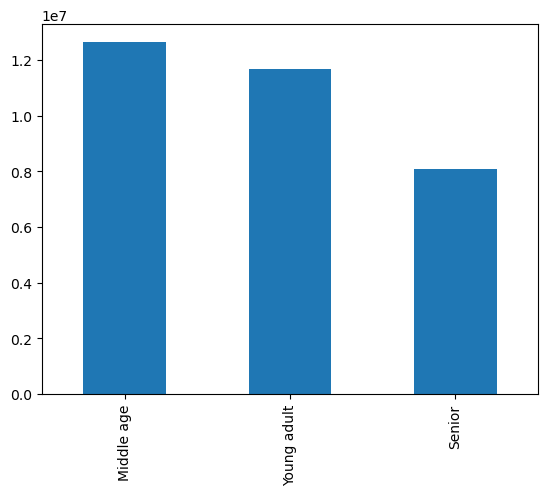

In [38]:
#Creating bar chart

bar_age = insta_data['age_flag'].value_counts().plot.bar()

In [39]:
#Exporting bar chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age.png'))

## 3.5 Creating income flag

In [40]:
max_income = insta_data ['income'].max()

In [41]:
print("Maximum income:", max_income)

Maximum income: 593901


In [42]:
#Creating flag using loc function
insta_data.loc[insta_data['income']>=150000,'income_flag'] = 'High income'

In [43]:
insta_data.loc[(insta_data['income']<150000) & (insta_data['income'] >=60000),'income_flag']= 'Medium income'


In [44]:
insta_data.loc[insta_data['income']<=60000,'income_flag'] = 'Low income'

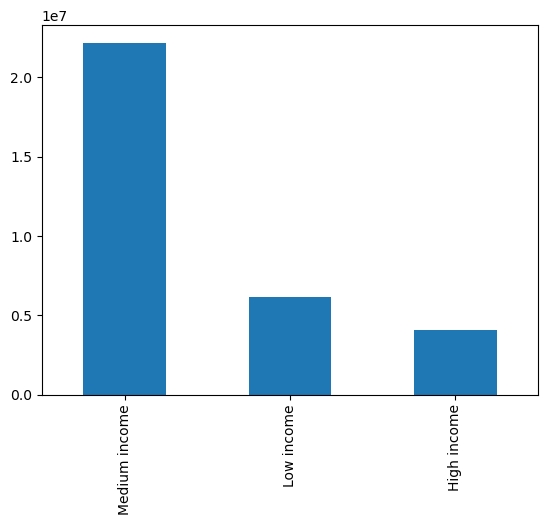

In [45]:
bar_income = insta_data['income_flag'].value_counts().plot.bar()

In [46]:
#Exporting bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

## 3.6 Creating bar chart by department sales

In [47]:
#Department id counts
insta_data['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

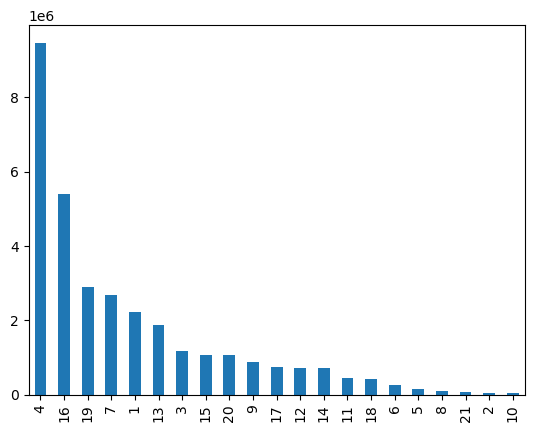

In [48]:
#Creating bar for department id

bar_department =insta_data['department_id'].value_counts().plot.bar()

In [49]:
#Checking columns
insta_data.columns

Index(['order_id', 'user_id', 'gender', 'age', 'state', 'region',
       'order_number', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag', 'median_on_days',
       'frequency_flag', 'exclusion_flag', 'age_flag', 'income_flag'],
      dtype='object')

In [50]:
#Importing departments data
big_data_1= pd.read_csv (os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [51]:
#Checking output
big_data_1.head(22)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [52]:
#Creating list of department names
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [53]:
department_counts = insta_data ['department_id'].value_counts()

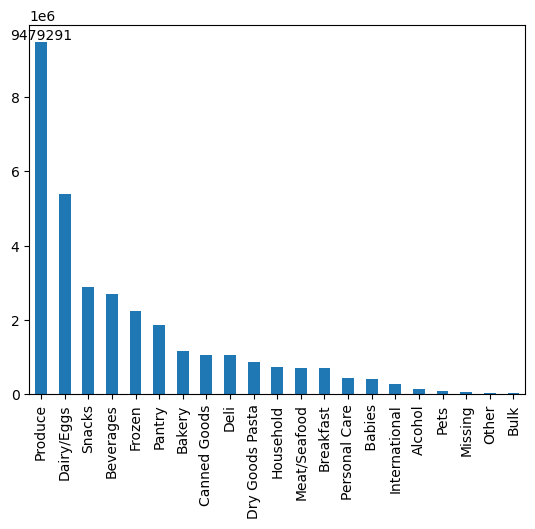

In [54]:
#Creating bar chart 
a1 = department_counts.plot.bar()
a1.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    a1.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [55]:
#Exporting bar chart 
a1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

## 3.7 Creating  bar chart by regions and departments

In [56]:
#Grouping department_id and region
region_dept = insta_data.groupby(['department_id','region']).size().unstack(fill_value=0)

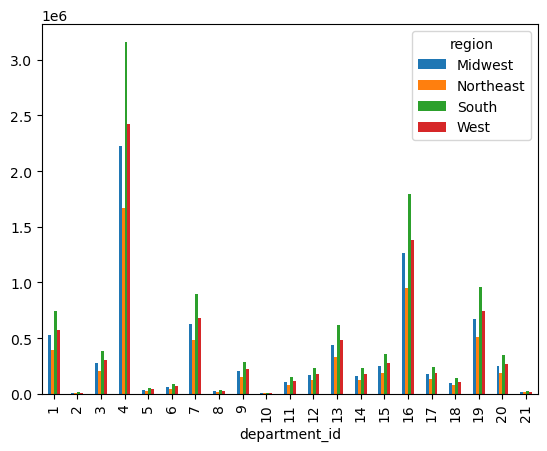

In [57]:
#Creating bar
region_dept_1 = region_dept.plot.bar(stacked=False)

In [58]:
#Exporting bar chart 
region_dept_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_region.png'))

## 3.8 Creating pie chart of loyal customers

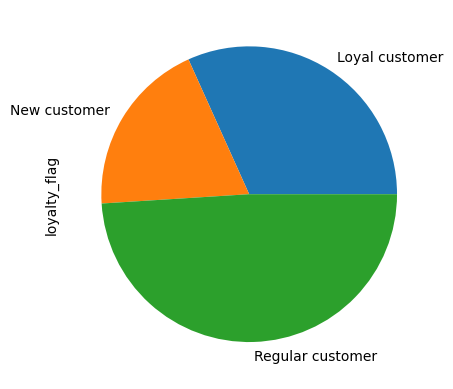

In [59]:
loyalty_label = insta_data['loyalty_flag'].value_counts().sort_index().plot.pie()

In [60]:
#Exporting pie chart 
loyalty_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_customers.png'))

In [61]:
#Grouping them by age

age_loyalty = insta_data.groupby(['age_flag','loyalty_flag']).size().unstack(fill_value=0)

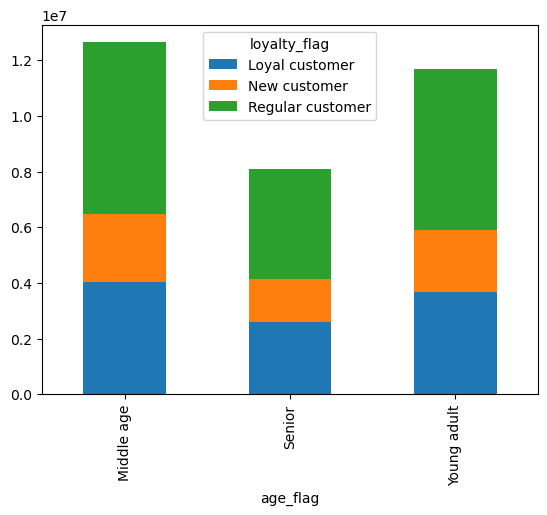

In [62]:
#Bar chart for age and loyalty 
age_loyalty = age_loyalty.plot.bar(stacked=True )

In [63]:
#Exporting bar chart 
age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyalty.png'))

In [64]:
#Grouping them by frequency 

loyal_frequency = insta_data.groupby(['loyalty_flag','frequency_flag']).size().unstack(fill_value=0)

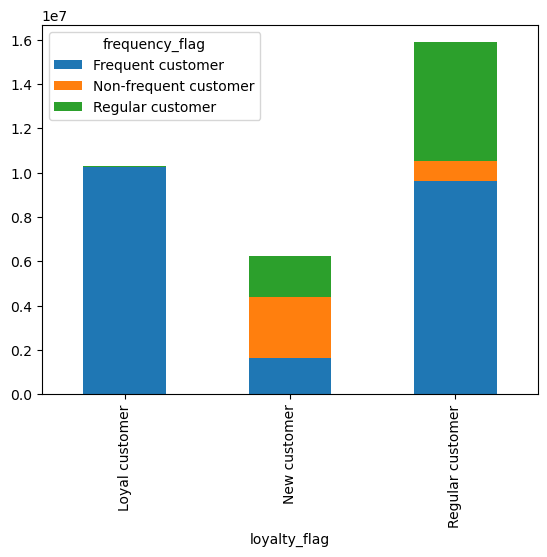

In [65]:
#Bar chart for age and loyalty 
loyal_frequency = loyal_frequency.plot.bar(stacked=True )

In [66]:
#Exporting bar chart 
loyal_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_frequency.png'))

## 3.9 Visualizations of number of dependants

In [67]:
#Confirming max number of dependants
max_n_dependants = insta_data ['n_dependants'].max()

In [68]:
print("Maximum number dependants:", max_n_dependants)

Maximum number dependants: 3


In [69]:
#Making a group
dependants = [1,2,3]

In [70]:
#Making a group of no dependants
no_dependants = [0]

In [71]:
#Dependants flag
insta_data.loc[insta_data['n_dependants'].isin(dependants), 'dependants'] = 'has dependants'

In [72]:
#No Dependants flag
insta_data.loc[insta_data['n_dependants'].isin(no_dependants), 'dependants'] = 'no dependants'

In [73]:
#Checking count
insta_data['dependants'].value_counts(dropna = False)

has dependants    24307356
no dependants      8097503
Name: dependants, dtype: int64

In [74]:
insta_data.head()

,order_id,user_id,gender,age,state,region,order_number,date_joined,n_dependants,fam_status,...,max_order,loyalty_flag,mean_price,spending_flag,median_on_days,frequency_flag,exclusion_flag,age_flag,income_flag,dependants
0,2539329,1,Female,31,Alabama,South,1,2/17/2019,3,married,...,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Young adult,Low income,has dependants
1,2398795,1,Female,31,Alabama,South,2,2/17/2019,3,married,...,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Young adult,Low income,has dependants
2,473747,1,Female,31,Alabama,South,3,2/17/2019,3,married,...,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Young adult,Low income,has dependants
3,2254736,1,Female,31,Alabama,South,4,2/17/2019,3,married,...,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Young adult,Low income,has dependants
4,431534,1,Female,31,Alabama,South,5,2/17/2019,3,married,...,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,No,Young adult,Low income,has dependants


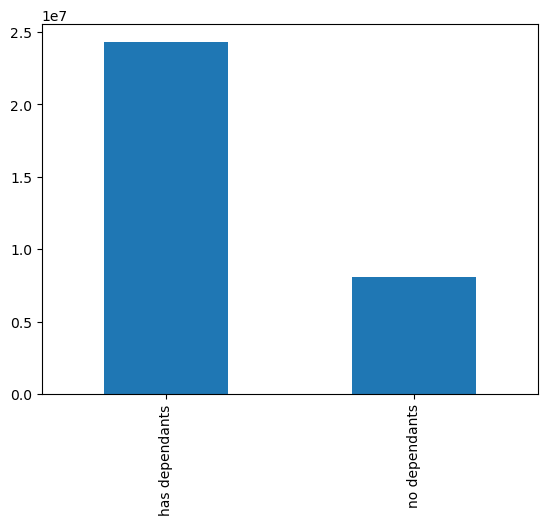

In [75]:
#Bar chart showing customers with dependants
bar_dependants = insta_data['dependants'].value_counts().sort_index().plot.bar()

In [76]:
#Exporting bar chart 
bar_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants.png'))

In [77]:
#Making a group of age and number of dependants
age_dependants = insta_data.groupby(['age','n_dependants']).size().unstack(fill_value=0)

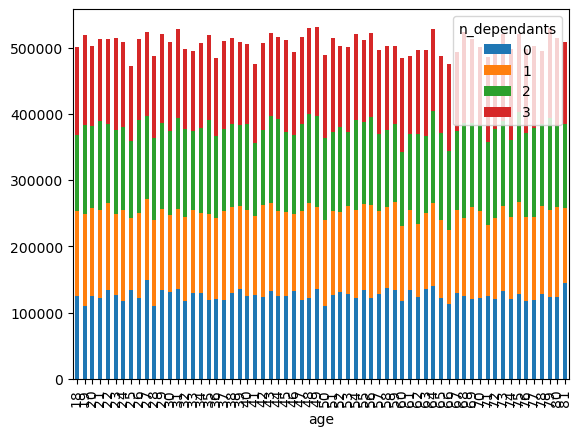

In [78]:
#Bar chart of age and n of dependants

age_dependants = age_dependants.plot.bar (stacked = True)

In [79]:
#Exporting bar chart 
age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants.png'))

## 3.10 Departments visualizations

In [80]:
#Stacked bar chart of dept and dependants
dept_dependants_counts = insta_data.groupby(['department_id','dependants']).size().unstack(fill_value=0)

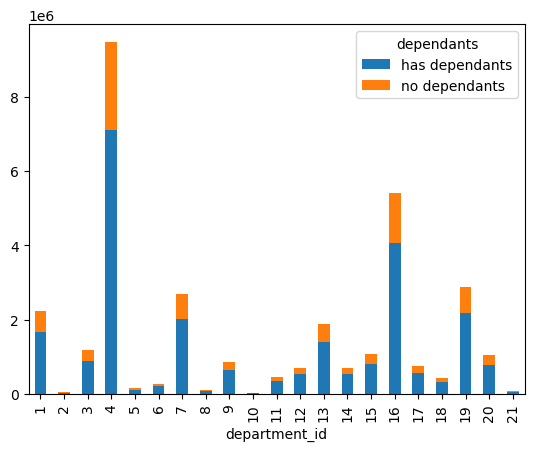

In [81]:
#Creating bar chart
dept_dependants = dept_dependants_counts.plot.bar(stacked=True )

In [82]:
#Exporting bar chart 
dept_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_dependants.png'))

In [83]:
#Bar chart of dept and frecuency of customers
dept_frequency_counts = insta_data.groupby(['department_id','frequency_flag']).size().unstack(fill_value=0)

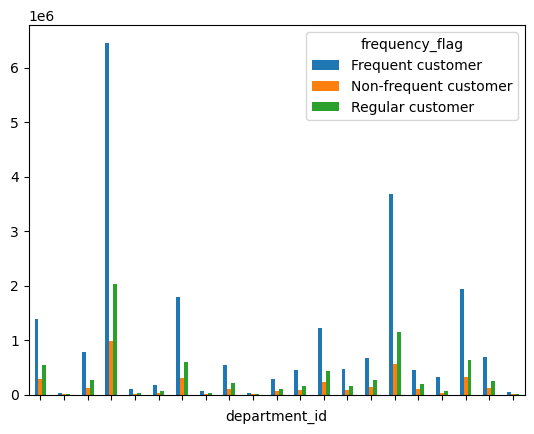

In [84]:
#Creating bar chart 
a2 = dept_frequency_counts.plot.bar()
a2.set_xticklabels([department_names.get(str(x), '') for x in dept_frequency_counts.index])
for i, v in enumerate(dept_frequency_counts):
    a1.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [85]:
#Exporting bar chart 
a2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_frequency.png'))

In [86]:
#Bar chart of dept and fam status
dept_famst_counts = insta_data.groupby(['department_id','fam_status']).size().unstack(fill_value=0)

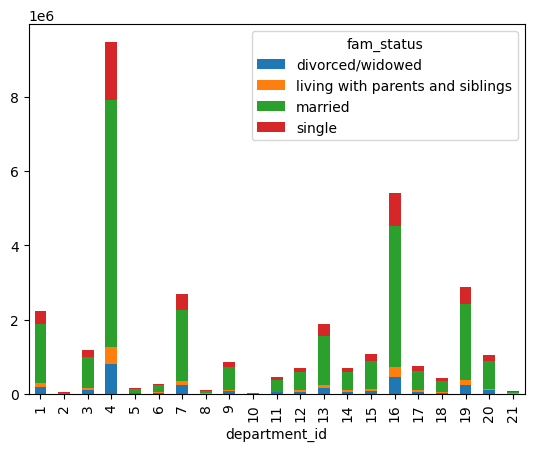

In [87]:
#Creating bar chart
dept_fam_status =dept_famst_counts.plot.bar(stacked=True )

In [88]:
#Exporting bar chart 
dept_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_fam_status.png'))

In [90]:
#Exporting data frame

insta_data_complete_2 = insta_data.to_pickle(os.path.join(path,'02 Data','Prepared Data','insta_data_complete_2.pkl'))